# Sparrow-Hawk-Cat populations

In [3]:
import SHCpopulation as SHC
import matplotlib.pyplot as plt
import numpy as np

## Run basic model

In [51]:
time_steps = 300

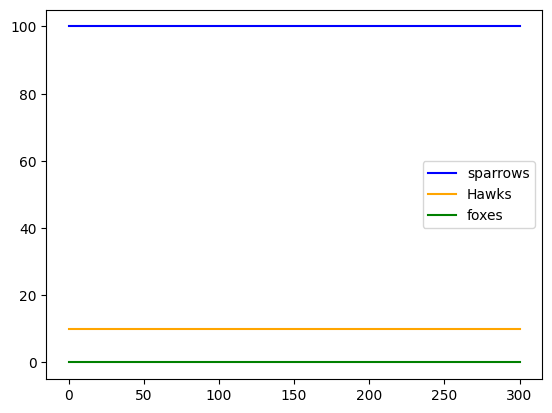

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-06  1.100e-05  1.110e-04  1.111e-03
             1.111e-02  1.111e-01  1.111e+00  1.111e+01  1.111e+02
             3.000e+02]
        y: [[ 1.000e+02  1.000e+02 ...  1.000e+02  1.000e+02]
            [ 1.000e+01  1.000e+01 ...  1.000e+01  1.000e+01]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x172b7d210>
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [52]:
#Steady system

SHC.population(time_steps,100,10,0)

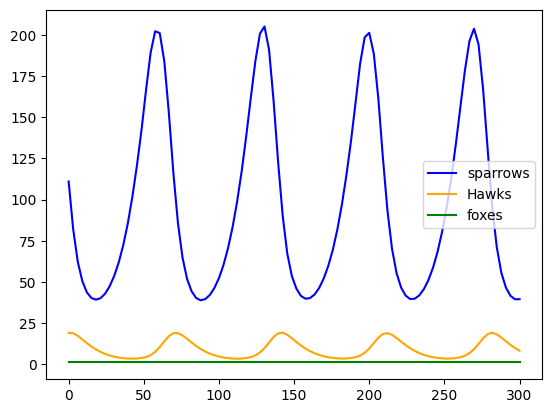

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.767e-01 ...  2.916e+02  3.000e+02]
        y: [[ 1.110e+02  1.091e+02 ...  4.513e+01  3.947e+01]
            [ 1.900e+01  1.903e+01 ...  1.339e+01  8.138e+00]
            [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x16a219ed0>
 t_events: None
 y_events: None
     nfev: 254
     njev: 0
      nlu: 0

In [53]:
#Roughly periodic system

SHC.population(time_steps,111,19,1)

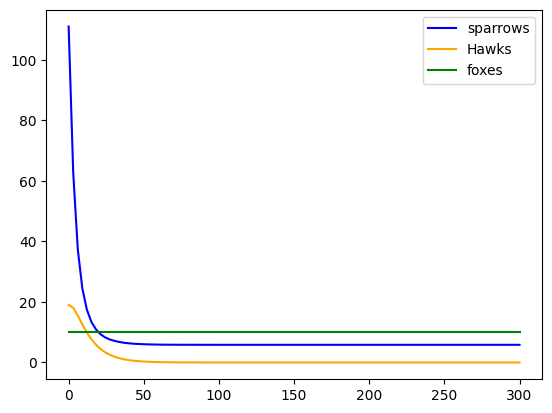

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.555e-01 ...  2.600e+02  3.000e+02]
        y: [[ 1.110e+02  1.078e+02 ...  5.833e+00  5.833e+00]
            [ 1.900e+01  1.903e+01 ...  5.106e-07  1.149e-06]
            [ 1.000e+01  1.000e+01 ...  1.000e+01  1.000e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x169fdfbb0>
 t_events: None
 y_events: None
     nfev: 140
     njev: 0
      nlu: 0

In [12]:
#Roughly decaying system

SHC.population(time_steps,111,19,10)

## Compare results of solve_ivp function versus iterative while-loop method

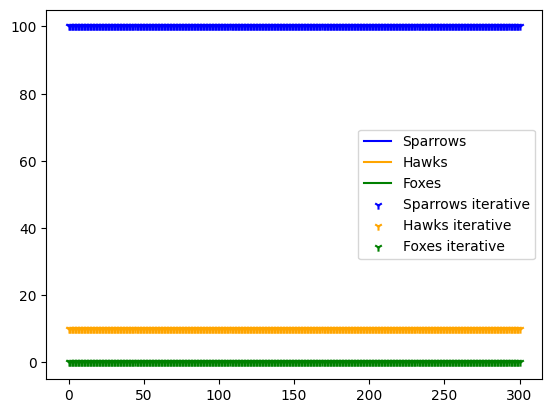

In [23]:
#Steady system, note same results for solve_ivp and manual while-loop method

time_steps = 300
sparrows = 100
hawks = 10
foxes = 0
time_span = np.linspace(0,time_steps,time_steps)

ivp_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
calc_population = SHC.iterative_population(time_steps,sparrows,hawks,foxes,plot = False)

fig, ax = plt.subplots()
ax.plot(time_span,ivp_population.sol(time_span)[0],label  = 'Sparrows', c = 'b')
ax.plot(time_span,ivp_population.sol(time_span)[1],label  = 'Hawks', c = 'orange')
ax.plot(time_span,ivp_population.sol(time_span)[2],label  = 'Foxes', c = 'green')
ax.scatter(time_span, calc_population[0], label  = 'Sparrows iterative', marker = '1', c = 'b')
ax.scatter(time_span, calc_population[1], label = 'Hawks iterative', marker = '1', c = 'orange')
ax.scatter(time_span, calc_population[2], label = 'Foxes iterative', marker = '1', c = 'green')
plt.legend()
plt.show()

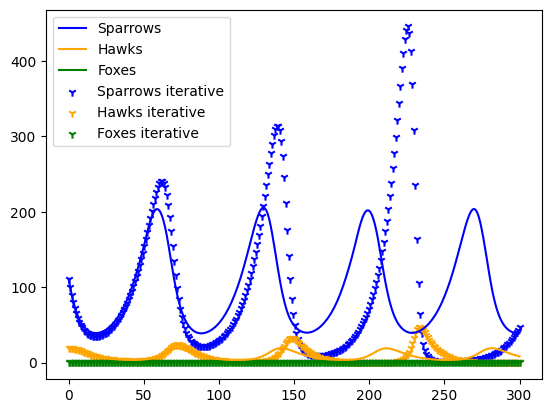

In [15]:
#Periodic system. Note iterative method steadily increases in its amplitude whilst solve_ivp method does not

time_steps = 300
sparrows = 111
hawks = 19
foxes = 1
time_span = np.linspace(0,time_steps,time_steps)

ivp_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
calc_population = SHC.iterative_population(time_steps,sparrows,hawks,foxes,plot = False)

fig, ax = plt.subplots()
ax.plot(time_span,ivp_population.sol(time_span)[0],label  = 'Sparrows', c = 'b')
ax.plot(time_span,ivp_population.sol(time_span)[1],label  = 'Hawks', c = 'orange')
ax.plot(time_span,ivp_population.sol(time_span)[2],label  = 'Foxes', c = 'green')
ax.scatter(time_span, calc_population[0], label  = 'Sparrows iterative', marker = '1', c = 'b')
ax.scatter(time_span, calc_population[1], label = 'Hawks iterative', marker = '1', c = 'orange')
ax.scatter(time_span, calc_population[2], label = 'Foxes iterative', marker = '1', c = 'green')
plt.legend()
plt.show()

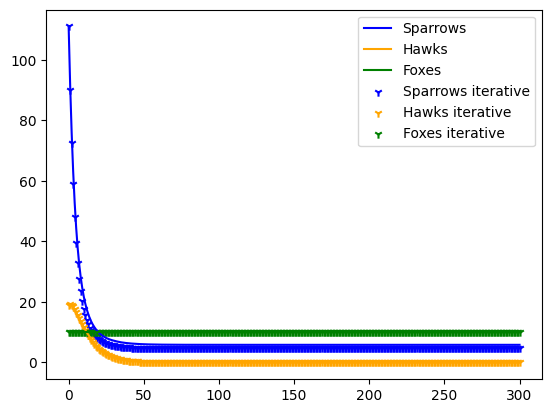

In [16]:
#decaying system, note similar results for both methods

time_steps = 300
sparrows = 111
hawks = 19
foxes = 10
time_span = np.linspace(0,time_steps,time_steps)

ivp_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
calc_population = SHC.iterative_population(time_steps,sparrows,hawks,foxes,plot = False)

fig, ax = plt.subplots()
ax.plot(time_span,ivp_population.sol(time_span)[0],label  = 'Sparrows', c = 'b')
ax.plot(time_span,ivp_population.sol(time_span)[1],label  = 'Hawks', c = 'orange')
ax.plot(time_span,ivp_population.sol(time_span)[2],label  = 'Foxes', c = 'green')
ax.scatter(time_span, calc_population[0], label  = 'Sparrows iterative', marker = '1', c = 'b')
ax.scatter(time_span, calc_population[1], label = 'Hawks iterative', marker = '1', c = 'orange')
ax.scatter(time_span, calc_population[2], label = 'Foxes iterative', marker = '1', c = 'green')
plt.legend()
plt.show()

## Compare resuts on using different integration methods in solve_ivp function

comparing the RK45 (Runge-Kutta method of order 5) and DOP853 (Runge-Kutta method of order 8) integration methods

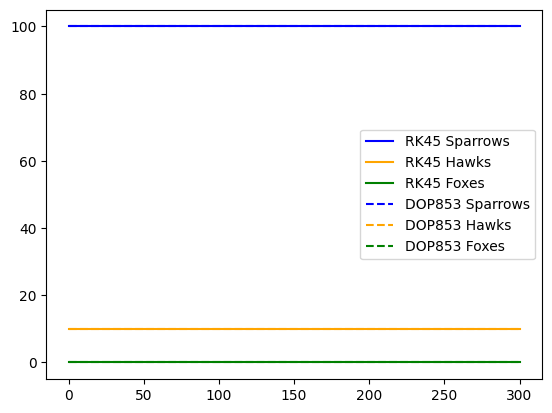

In [28]:
#Steady system, note same results for RK45 and DOP853 methods

time_steps = 300
sparrows = 100
hawks = 10
foxes = 0
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
DOP853_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'DOP853')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,DOP853_population.sol(time_span)[0],label  = 'DOP853 Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[1],label  = 'DOP853 Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[2],label  = 'DOP853 Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

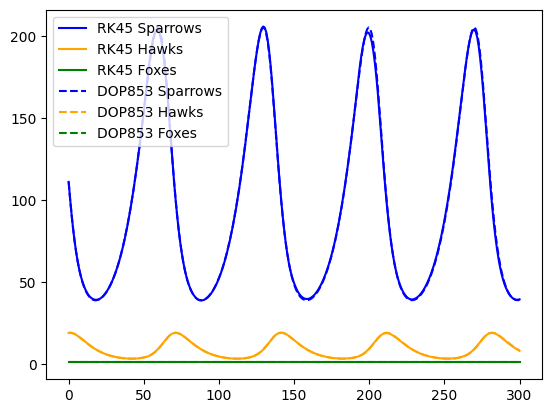

In [27]:
#Steady system, note only slight differences between RK45 and DOP853 methods

time_steps = 300
sparrows = 111
hawks = 19
foxes = 1
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
DOP853_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'DOP853')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,DOP853_population.sol(time_span)[0],label  = 'DOP853 Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[1],label  = 'DOP853 Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[2],label  = 'DOP853 Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

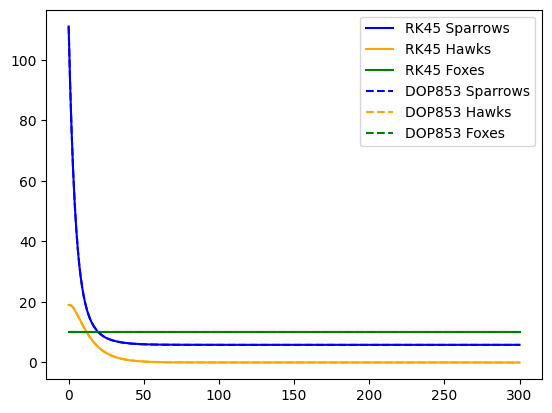

In [29]:
#Steady system, note same results for RK45 and DOP853 methods

time_steps = 300
sparrows = 111
hawks = 19
foxes = 10
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
DOP853_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'DOP853')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,DOP853_population.sol(time_span)[0],label  = 'DOP853 Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[1],label  = 'DOP853 Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,DOP853_population.sol(time_span)[2],label  = 'DOP853 Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

## Compare resuts on using different integration methods in solve_ivp function

comparing the RK45 (Runge-Kutta method of order 5) and BDF ( Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation) integration methods.

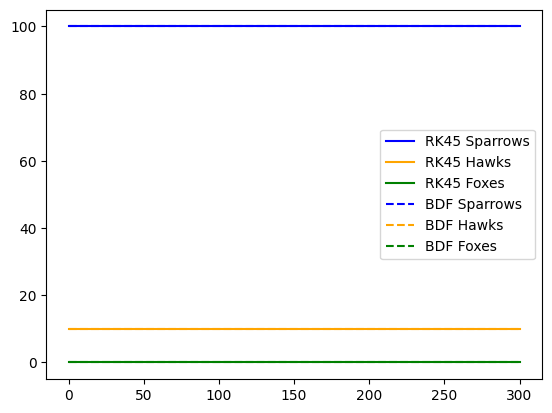

In [35]:
#Steady system, note same results for RK45 and BDF methods

time_steps = 300
sparrows = 100
hawks = 10
foxes = 0
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
BDF_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'BDF')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,BDF_population.sol(time_span)[0],label  = 'BDF Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[1],label  = 'BDF Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[2],label  = 'BDF Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

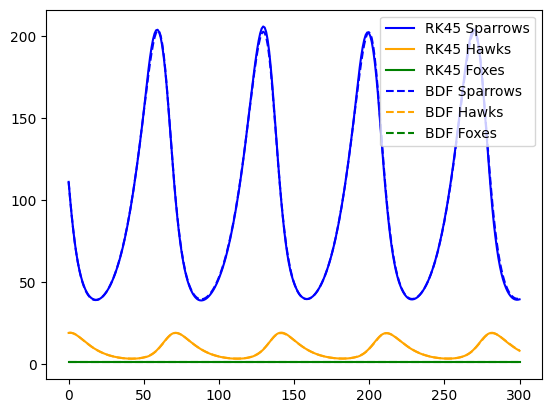

In [36]:
#Steady system, note almost same results for RK45 and BDF methods

time_steps = 300
sparrows = 111
hawks = 19
foxes = 1
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
BDF_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'BDF')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,BDF_population.sol(time_span)[0],label  = 'BDF Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[1],label  = 'BDF Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[2],label  = 'BDF Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

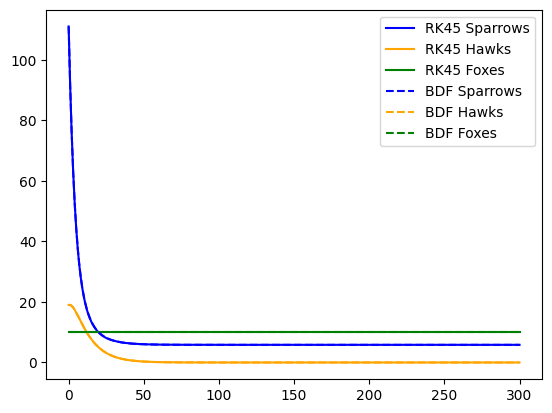

In [39]:
#Steady system, note same results for RK45 and BDF methods

time_steps = 300
sparrows = 111
hawks = 19
foxes = 10
time_span = np.linspace(0,time_steps,time_steps)

RK45_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
BDF_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, method = 'BDF')

fig, ax = plt.subplots()
ax.plot(time_span,RK45_population.sol(time_span)[0],label  = 'RK45 Sparrows', c = 'b')
ax.plot(time_span,RK45_population.sol(time_span)[1],label  = 'RK45 Hawks', c = 'orange')
ax.plot(time_span,RK45_population.sol(time_span)[2],label  = 'RK45 Foxes', c = 'green')
ax.plot(time_span,BDF_population.sol(time_span)[0],label  = 'BDF Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[1],label  = 'BDF Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,BDF_population.sol(time_span)[2],label  = 'BDF Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

# Run basic models with increased birth rates

birth rates of Hawks and Sparrows increased by 50%

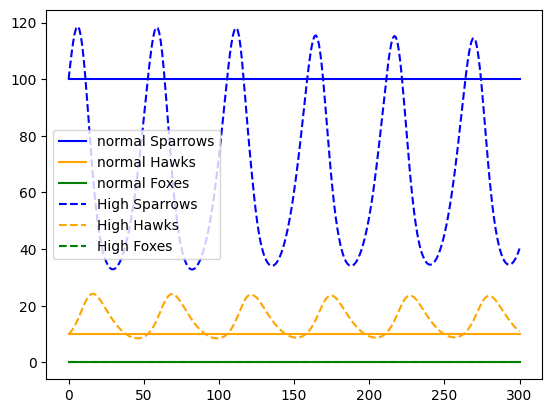

In [41]:
time_steps = 300
sparrows = 100
hawks = 10
foxes = 0
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
high_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, A = 0.15, E = 0.0015)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,high_population.sol(time_span)[0],label  = 'High Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[1],label  = 'High Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[2],label  = 'High Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

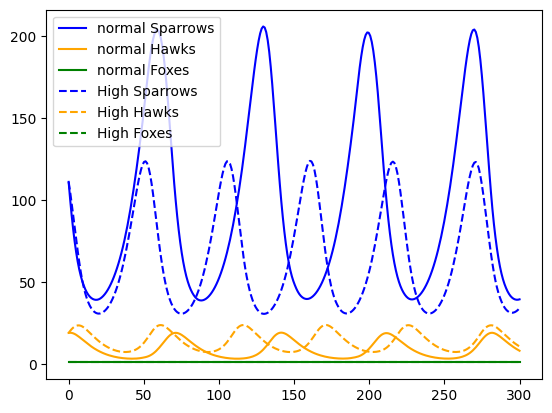

In [44]:
time_steps = 300
sparrows = 111
hawks = 19
foxes = 1
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
high_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, A = 0.15, E = 0.0015)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,high_population.sol(time_span)[0],label  = 'High Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[1],label  = 'High Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[2],label  = 'High Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

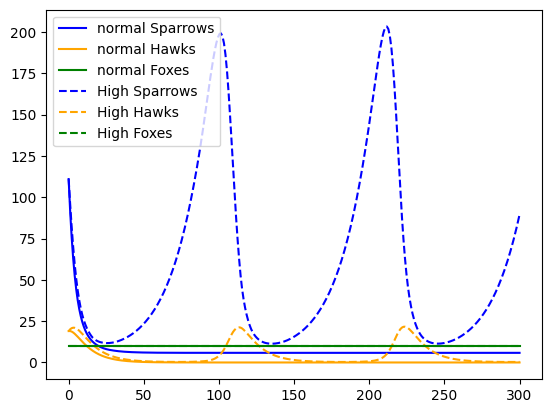

In [45]:
time_steps = 300
sparrows = 111
hawks = 19
foxes = 10
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
high_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, A = 0.15, E = 0.0015)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,high_population.sol(time_span)[0],label  = 'High Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[1],label  = 'High Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,high_population.sol(time_span)[2],label  = 'High Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

# Run basic model with increased death rates

Death rates of hawks and sparrows increased by 50%

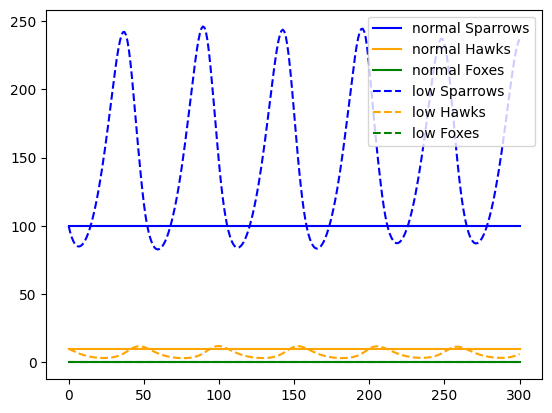

In [46]:
time_steps = 300
sparrows = 100
hawks = 10
foxes = 0
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
low_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, B = 0.015, C = 0.015, D = 0.15)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,low_population.sol(time_span)[0],label  = 'low Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[1],label  = 'low Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[2],label  = 'low Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

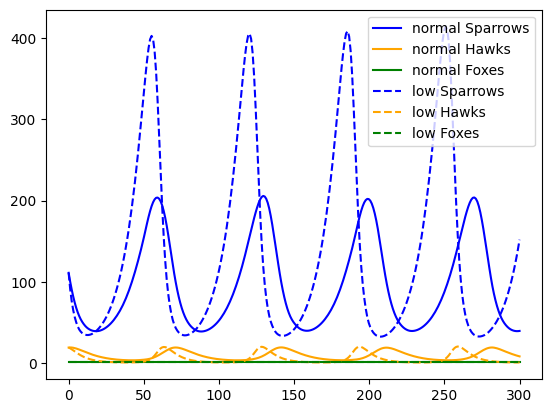

In [49]:
time_steps = 300
sparrows = 111
hawks = 19
foxes = 1
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
low_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, B = 0.015, C = 0.015, D = 0.15)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,low_population.sol(time_span)[0],label  = 'low Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[1],label  = 'low Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[2],label  = 'low Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

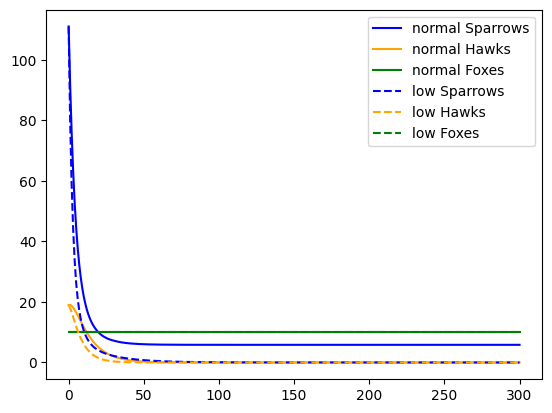

In [50]:
time_steps = 300
sparrows = 111
hawks = 19
foxes = 10
time_span = np.linspace(0,time_steps,time_steps)

normal_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False)
low_population = SHC.population(time_steps,sparrows,hawks,foxes,plot = False, B = 0.015, C = 0.015, D = 0.15)

fig, ax = plt.subplots()
ax.plot(time_span,normal_population.sol(time_span)[0],label  = 'normal Sparrows', c = 'b')
ax.plot(time_span,normal_population.sol(time_span)[1],label  = 'normal Hawks', c = 'orange')
ax.plot(time_span,normal_population.sol(time_span)[2],label  = 'normal Foxes', c = 'green')
ax.plot(time_span,low_population.sol(time_span)[0],label  = 'low Sparrows', c = 'b',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[1],label  = 'low Hawks', c = 'orange',linestyle = 'dashed')
ax.plot(time_span,low_population.sol(time_span)[2],label  = 'low Foxes', c = 'green',linestyle = 'dashed')
plt.legend()
plt.show()

In [4]:
SHC.pop

Object `SHCpopulation` not found.
